In [8]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('candidates.csv')
data.head()
data.shape

(4780, 3)

In [11]:
DG=nx.Graph()

"""Initiating host nodes"""

for host in data['host'].unique().tolist():
    DG.add_node(host, type="host", speciesname = host, bipartite = 0)

"""Initiating virus nodes"""

for virus in data['virus'].unique().tolist():
    DG.add_node(virus, type="virus", virusname = virus, bipartite = 1)

"""Iterating through the raw data to add Edges if a virus is found in a host"""
for index, row in data.iterrows():
    DG.add_edge(row['host'], row['virus'], weight = 1)

"""Creating positions of the nodes"""
#layout = nx.spring_layout(DG, k = 0.05, scale=2) #
layout = nx.fruchterman_reingold_layout(DG, k = 0.05, iterations=50)

network_name = 'virus_host'

"""write graph """
nx.write_graphml(DG, network_name + "_bipartite.graphml")

In [19]:
G = nx.read_graphml('virus_host_bipartite.graphml')

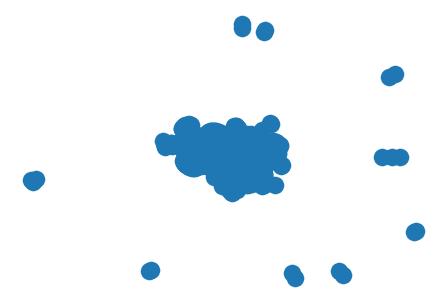

In [22]:
nx.draw(G)